# Doroob E-Learning Dataset

# منصة دروب هي منصة وطنية للتدريب الإلكتروني وهي إحدى مبادرات صندوق تنمية الموارد البشرية التي تسعى إلى تمكين القوى العاملة من خلال تطوير قدراتهم ورفع مهاراتهم وفق احتياجات سوق العمل وسبب الدراسة الاحصائية  لمعرفة اهمية منصة دروب وبيان مدى اهتمام المتدربين لحضور الدورات المقدمه من منصة دروب من كافة أنحاء اللمملكة

## Website :https://www.doroob.sa/
### Dataset Source: https://od.data.gov.sa/ar/national-platforms

In [62]:
# First install required liberary to print arabic letters clearly
#import sys
#!{sys.executable} -m pip install arabic_reshaper
#!{sys.executable} -m pip install python-bidi

In [63]:
## Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

In [64]:
df = pd.read_excel('doroob_2022.xlsx', sheet_name=None)

In [65]:
stdf = pd.DataFrame(list(df.values())[0])


In [66]:
columns = [c for c in stdf.columns]
columns

['ID',
 'العمر',
 'اسم التدريب',
 'تاريخ التسجيل',
 'تاريخ الانتهاء',
 'المدينة',
 'المنطقة',
 'الجنس']

In [67]:
# this is the main dataframe that we will work with
stdf.head()

,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس
0,1,45.0,برنامج معالجة النصوص Word,2022-12-15 11:58:39,NaT,جدة,مكة المكرمة,انثى
1,2,47.0,إدارة فرق العمل عن بعد,2022-12-14 21:44:02,2022-12-14 21:48:24,جدة,مكة المكرمة,انثى
2,3,21.0,رحلة البحث عن عمل,2022-12-15 20:55:28,2022-12-16 15:19:38,جدة,مكة المكرمة,انثى
3,4,40.0,برنامج معالجة النصوص Word,2022-12-15 01:50:38,2022-12-15 01:52:49,جدة,مكة المكرمة,انثى
4,5,43.0,فن إتيكيت العمل,2022-12-15 03:55:45,NaT,أحد رفيدة,NaN,انثى


In [68]:
# this is just a test for grouping 'اسم التدريب'
group = stdf[['ID' , 'اسم التدريب']].groupby('اسم التدريب').count()
group.sort_values(by='ID', ascending=False, inplace=True)
group.head()

,ID
اسم التدريب,
العقلية الريادية وإدارة الأزمات,4670
العناصر الرئيسية لنجاح ريادة الأعمال,4026
استمرارية الأعمال والتعافي من الأزمات,3595
إدارة المشتريات وأصحاب مصلحة المشروع,3583
مكونات الإبداع في بيئة العمل,3548


## First Apply EDA

### EDA steps: head, shape, info, describe, missing values

In [69]:
stdf

,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس
0,1,45.0,برنامج معالجة النصوص Word,2022-12-15 11:58:39,NaT,جدة,مكة المكرمة,انثى
1,2,47.0,إدارة فرق العمل عن بعد,2022-12-14 21:44:02,2022-12-14 21:48:24,جدة,مكة المكرمة,انثى
2,3,21.0,رحلة البحث عن عمل,2022-12-15 20:55:28,2022-12-16 15:19:38,جدة,مكة المكرمة,انثى
3,4,40.0,برنامج معالجة النصوص Word,2022-12-15 01:50:38,2022-12-15 01:52:49,جدة,مكة المكرمة,انثى
4,5,43.0,فن إتيكيت العمل,2022-12-15 03:55:45,NaT,أحد رفيدة,NaN,انثى
...,...,...,...,...,...,...,...,...
150807,150808,52.0,التسويق بالبريد الإلكتروني,2022-12-07 13:23:20,2022-12-14 07:26:18,الزلفي,الرياض,انثى
150808,150809,49.0,البيع الاحترافي,2022-12-13 15:26:28,2022-12-13 15:30:13,NaN,NaN,انثى
150809,150810,41.0,كيف تكتشف ميولك المهني؟,2022-12-07 11:46:48,2022-12-07 13:22:53,NaN,NaN,انثى
150810,150811,38.0,إدارة الضغوط في العمل,2022-12-07 05:14:22,2022-12-07 05:32:20,NaN,NaN,ذكر


In [70]:
stdf.head()

,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس
0,1,45.0,برنامج معالجة النصوص Word,2022-12-15 11:58:39,NaT,جدة,مكة المكرمة,انثى
1,2,47.0,إدارة فرق العمل عن بعد,2022-12-14 21:44:02,2022-12-14 21:48:24,جدة,مكة المكرمة,انثى
2,3,21.0,رحلة البحث عن عمل,2022-12-15 20:55:28,2022-12-16 15:19:38,جدة,مكة المكرمة,انثى
3,4,40.0,برنامج معالجة النصوص Word,2022-12-15 01:50:38,2022-12-15 01:52:49,جدة,مكة المكرمة,انثى
4,5,43.0,فن إتيكيت العمل,2022-12-15 03:55:45,NaT,أحد رفيدة,NaN,انثى


In [71]:
stdf.shape

(150812, 8)

In [72]:
stdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150812 entries, 0 to 150811
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              150812 non-null  int64         
 1   العمر           150741 non-null  float64       
 2   اسم التدريب     150812 non-null  object        
 3   تاريخ التسجيل   150812 non-null  datetime64[ns]
 4   تاريخ الانتهاء  109262 non-null  datetime64[ns]
 5   المدينة         130455 non-null  object        
 6   المنطقة         95106 non-null   object        
 7   الجنس           150579 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 9.2+ MB


In [73]:
stdf.describe(include='all')

C:\Users\moaat\AppData\Local\Temp\ipykernel_28320\4149370944.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  stdf.describe(include='all')
C:\Users\moaat\AppData\Local\Temp\ipykernel_28320\4149370944.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  stdf.describe(include='all')


,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس
count,150812.000000,150741.000000,150812,150812,109262,130455,95106,150579
unique,NaN,NaN,357,121634,93082,138,13,2
top,NaN,NaN,العقلية الريادية وإدارة الأزمات,2022-12-17 11:02:25,2022-12-17 10:15:32,الرياض,الرياض,انثى
freq,NaN,NaN,4670,7,6,22795,29195,110277
first,NaN,NaN,NaN,2022-12-06 21:32:49,2022-12-06 21:34:09,NaN,NaN,NaN
last,NaN,NaN,NaN,2022-12-18 21:33:40,2022-12-18 21:33:41,NaN,NaN,NaN
mean,75406.500000,41.618710,NaN,NaN,NaN,NaN,NaN,NaN
std,43535.818736,12.548342,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,-46.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,37703.750000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
print('The missung values in each column')
print(stdf.isna().sum())
print('Total missing values: ',sum(stdf.isna().sum()))

The missung values in each column
ID                    0
العمر                71
اسم التدريب           0
تاريخ التسجيل         0
تاريخ الانتهاء    41550
المدينة           20357
المنطقة           55706
الجنس               233
dtype: int64
Total missing values:  117917


### Apply the additional EDA steps based on your dataset needs.

In [75]:
#remove all recoreds with null value on stdf except 'تاريخ الانتهاء' 
#because we want to find if the student finish the course or not.

del columns[4] # remove 'تاريخ الانتهاء' from colomns
stdf.dropna(subset=columns,inplace=True)
stdf

,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس
0,1,45.0,برنامج معالجة النصوص Word,2022-12-15 11:58:39,NaT,جدة,مكة المكرمة,انثى
1,2,47.0,إدارة فرق العمل عن بعد,2022-12-14 21:44:02,2022-12-14 21:48:24,جدة,مكة المكرمة,انثى
2,3,21.0,رحلة البحث عن عمل,2022-12-15 20:55:28,2022-12-16 15:19:38,جدة,مكة المكرمة,انثى
3,4,40.0,برنامج معالجة النصوص Word,2022-12-15 01:50:38,2022-12-15 01:52:49,جدة,مكة المكرمة,انثى
5,6,45.0,خدمة العملاء - تَعامل بإحترافية,2022-12-15 21:28:27,NaT,جدة,مكة المكرمة,انثى
...,...,...,...,...,...,...,...,...
150791,150792,42.0,مفاتيح التفاوض الفعال,2022-12-07 20:38:12,NaT,تبوك,تبوك,انثى
150797,150798,24.0,إدارة المنتجات,2022-12-12 11:19:04,2022-12-12 12:42:06,تبوك,تبوك,ذكر
150799,150800,45.0,مكونات الإبداع في بيئة العمل,2022-12-07 16:39:18,2022-12-07 16:46:28,تبوك,تبوك,انثى
150802,150803,22.0,برنامج جداول البيانات Excel,2022-12-13 21:39:51,2022-12-13 22:09:45,الدوادمي,الرياض,ذكر


In [76]:
# Add one column of Duratin it take to finish the course
Duration = stdf.iloc[:,4]-stdf.iloc[:,3]
stdf['Duration'] = Duration


In [77]:
#to get a picture for cleaning by age
stdf.groupby(by='العمر').max()

,ID,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس,Duration
العمر,,,,,,,,
-46.0,145664,مهارات القيادة,2022-12-18 04:07:43,2022-12-18 04:08:49,جدة,مكة المكرمة,ذكر,1 days 04:50:21
-45.0,116697,كيف تجعل صاحب العمل يرى إمكانياتك,2022-12-17 23:49:50,2022-12-17 23:53:56,الاحساء,المنطقة الشرقية,ذكر,0 days 00:04:06
-44.0,89945,مهارات التفكير الإبداعي,2022-12-18 20:34:40,2022-12-15 21:05:34,المدينة المنورة,المدينة المنورة,ذكر,0 days 00:23:02
-42.0,79264,مهارات التفكير الإبداعي,2022-12-12 20:00:02,2022-12-12 21:43:43,خميس مشيط,عسير,ذكر,0 days 01:43:41
-41.0,128774,شخصيتك علامة تجارية,2022-12-17 18:50:59,2022-12-18 13:13:15,القصيم,القصيم,انثى,0 days 20:32:57
-40.0,140672,مكونات الإبداع في بيئة العمل,2022-12-18 11:43:36,2022-12-18 11:49:50,الجوف,الجوف,انثى,0 days 01:34:17
6.0,136692,المهارات الرقمية في بيئة العمل,2022-12-18 12:50:22,2022-12-07 17:04:50,الرياض,الرياض,انثى,0 days 09:18:08
14.0,113953,مهارات المحادثة باللغة الإنجليزية للمبتدئين,2022-12-18 18:36:59,2022-12-17 13:17:11,جدة,مكة المكرمة,ذكر,0 days 00:04:26
15.0,146558,وسائل وتقنيات التسويق الإلكتروني,2022-12-18 21:07:59,2022-12-18 19:49:05,ينبع البحر,مكة المكرمة,ذكر,5 days 16:41:13


In [78]:
# there is a huge decrease in age after 56 so I kept the numbers between 60-15
stdf=stdf[stdf['العمر'].between(15,60)]


In [79]:
# this is a prefernce for keeping the data organize
stdf.sort_values(by='العمر', ignore_index=True)
stdf['ID']=stdf.index+1
stdf

C:\Users\moaat\AppData\Local\Temp\ipykernel_28320\2350728027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stdf['ID']=stdf.index+1


,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس,Duration
0,1,45.0,برنامج معالجة النصوص Word,2022-12-15 11:58:39,NaT,جدة,مكة المكرمة,انثى,NaT
1,2,47.0,إدارة فرق العمل عن بعد,2022-12-14 21:44:02,2022-12-14 21:48:24,جدة,مكة المكرمة,انثى,0 days 00:04:22
2,3,21.0,رحلة البحث عن عمل,2022-12-15 20:55:28,2022-12-16 15:19:38,جدة,مكة المكرمة,انثى,0 days 18:24:10
3,4,40.0,برنامج معالجة النصوص Word,2022-12-15 01:50:38,2022-12-15 01:52:49,جدة,مكة المكرمة,انثى,0 days 00:02:11
5,6,45.0,خدمة العملاء - تَعامل بإحترافية,2022-12-15 21:28:27,NaT,جدة,مكة المكرمة,انثى,NaT
...,...,...,...,...,...,...,...,...,...
150791,150792,42.0,مفاتيح التفاوض الفعال,2022-12-07 20:38:12,NaT,تبوك,تبوك,انثى,NaT
150797,150798,24.0,إدارة المنتجات,2022-12-12 11:19:04,2022-12-12 12:42:06,تبوك,تبوك,ذكر,0 days 01:23:02
150799,150800,45.0,مكونات الإبداع في بيئة العمل,2022-12-07 16:39:18,2022-12-07 16:46:28,تبوك,تبوك,انثى,0 days 00:07:10
150802,150803,22.0,برنامج جداول البيانات Excel,2022-12-13 21:39:51,2022-12-13 22:09:45,الدوادمي,الرياض,ذكر,0 days 00:29:54


In [80]:
stdf.describe(include='all')

C:\Users\moaat\AppData\Local\Temp\ipykernel_28320\4149370944.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  stdf.describe(include='all')
C:\Users\moaat\AppData\Local\Temp\ipykernel_28320\4149370944.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  stdf.describe(include='all')


,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس,Duration
count,94904.000000,94904.000000,94904,94904,68274,94904,94904,94904,68274
unique,NaN,NaN,355,82674,61680,39,13,2,NaN
top,NaN,NaN,العقلية الريادية وإدارة الأزمات,2022-12-17 19:52:53,2022-12-18 17:52:38,الرياض,الرياض,انثى,NaN
freq,NaN,NaN,2825,6,4,22729,29121,69217,NaN
first,NaN,NaN,NaN,2022-12-06 21:32:49,2022-12-06 21:34:09,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2022-12-18 21:33:39,2022-12-18 21:33:41,NaN,NaN,NaN,NaN
mean,75463.291031,41.203785,NaN,NaN,NaN,NaN,NaN,NaN,0 days 03:39:07.567199812
std,43735.689450,7.994024,NaN,NaN,NaN,NaN,NaN,NaN,0 days 15:10:27.016484313
min,1.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:14
25%,37428.750000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:02:21


# 1
###   - معرفة أكثر خمس دورات استخدامًا

In [81]:
group = stdf[['ID' , 'اسم التدريب']].groupby('اسم التدريب').count()
group.sort_values(by='ID', ascending=False, inplace=True)
group.head(5)

,ID
اسم التدريب,
العقلية الريادية وإدارة الأزمات,2825
العناصر الرئيسية لنجاح ريادة الأعمال,2434
استمرارية الأعمال والتعافي من الأزمات,2200
إدارة المشتريات وأصحاب مصلحة المشروع,2176
مكونات الإبداع في بيئة العمل,2123


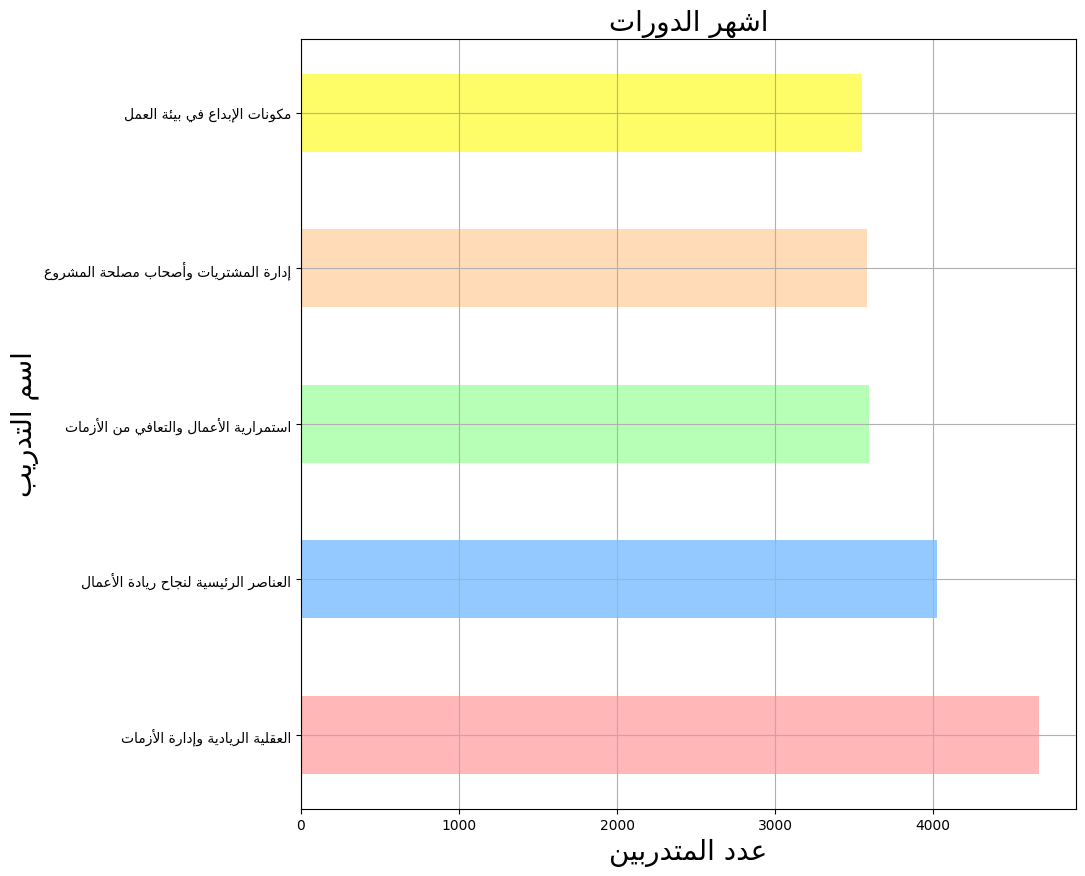

In [82]:
name1 = get_display(arabic_reshaper.reshape('العقلية الريادية وإدارة الأزمات'))
name2 = get_display(arabic_reshaper.reshape('العناصر الرئيسية لنجاح ريادة الأعمال'))
name3 = get_display(arabic_reshaper.reshape('استمرارية الأعمال والتعافي من الأزمات'))
name4 = get_display(arabic_reshaper.reshape('إدارة المشتريات وأصحاب مصلحة المشروع'))
name5 = get_display(arabic_reshaper.reshape('مكونات الإبداع في بيئة العمل'))
Training_names = [name1, name2, name3, name4, name5]
Numbers_of_trainees = [4670, 4026, 3595, 3583, 3548]
plt.figure(figsize=(10, 10))
plt.title(get_display(arabic_reshaper.reshape('اشهر الدورات')),fontsize = 20)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#FEFD26']
plt.barh(Training_names,Numbers_of_trainees,height=0.5, color=colors,alpha = 0.7)

ylbl = get_display( arabic_reshaper.reshape('اسم التدريب'))
xlbl = get_display( arabic_reshaper.reshape('عدد المتدربين'))
plt.xlabel(xlbl,fontsize = 20)
plt.ylabel(ylbl,fontsize = 20)
plt.grid()


plt.show()

# 2
### -  المواضيع الاكثر اهتماماً لكل (ذكر\انثى)

In [83]:
Female_male=stdf[['الجنس','اسم التدريب']]
Female_male

,الجنس,اسم التدريب
0,انثى,برنامج معالجة النصوص Word
1,انثى,إدارة فرق العمل عن بعد
2,انثى,رحلة البحث عن عمل
3,انثى,برنامج معالجة النصوص Word
5,انثى,خدمة العملاء - تَعامل بإحترافية
...,...,...
150791,انثى,مفاتيح التفاوض الفعال
150797,ذكر,إدارة المنتجات
150799,انثى,مكونات الإبداع في بيئة العمل
150802,ذكر,برنامج جداول البيانات Excel


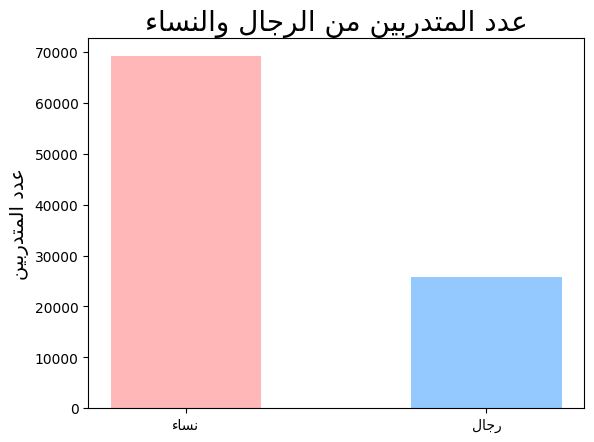

In [84]:
female=Female_male.loc[Female_male['الجنس']==
                 'انثى',
                 'الجنس'].count()
male=Female_male.loc[Female_male['الجنس']==
                 'ذكر',
                 'الجنس'].count()

plt.title(get_display(arabic_reshaper.reshape('عدد المتدربين من الرجال والنساء')),fontsize = 20)
plt.style.use('fivethirtyeight')

gender=[get_display(arabic_reshaper.reshape('نساء')),get_display(arabic_reshaper.reshape('رجال'))]
gender_count=[female,male]
plt.bar(gender,gender_count,width=0.5, color=colors,alpha = 0.7 )

plt.ylabel(get_display(arabic_reshaper.reshape('عدد المتدربين')),fontsize = 14)
plt.show()

## 3
### عدد المتدربين من كل منطقه..

In [85]:
# to be compeleted

group = stdf.groupby('المنطقة').count()
pd.DataFrame(group)

# Extract areas and put in a list
areas = group.head(20).index.tolist()
areas = [get_display(arabic_reshaper.reshape(x)) for x in areas]


In [86]:
# Extract counts of each area and put them on a list
values = [int(x) for x in group['ID']]


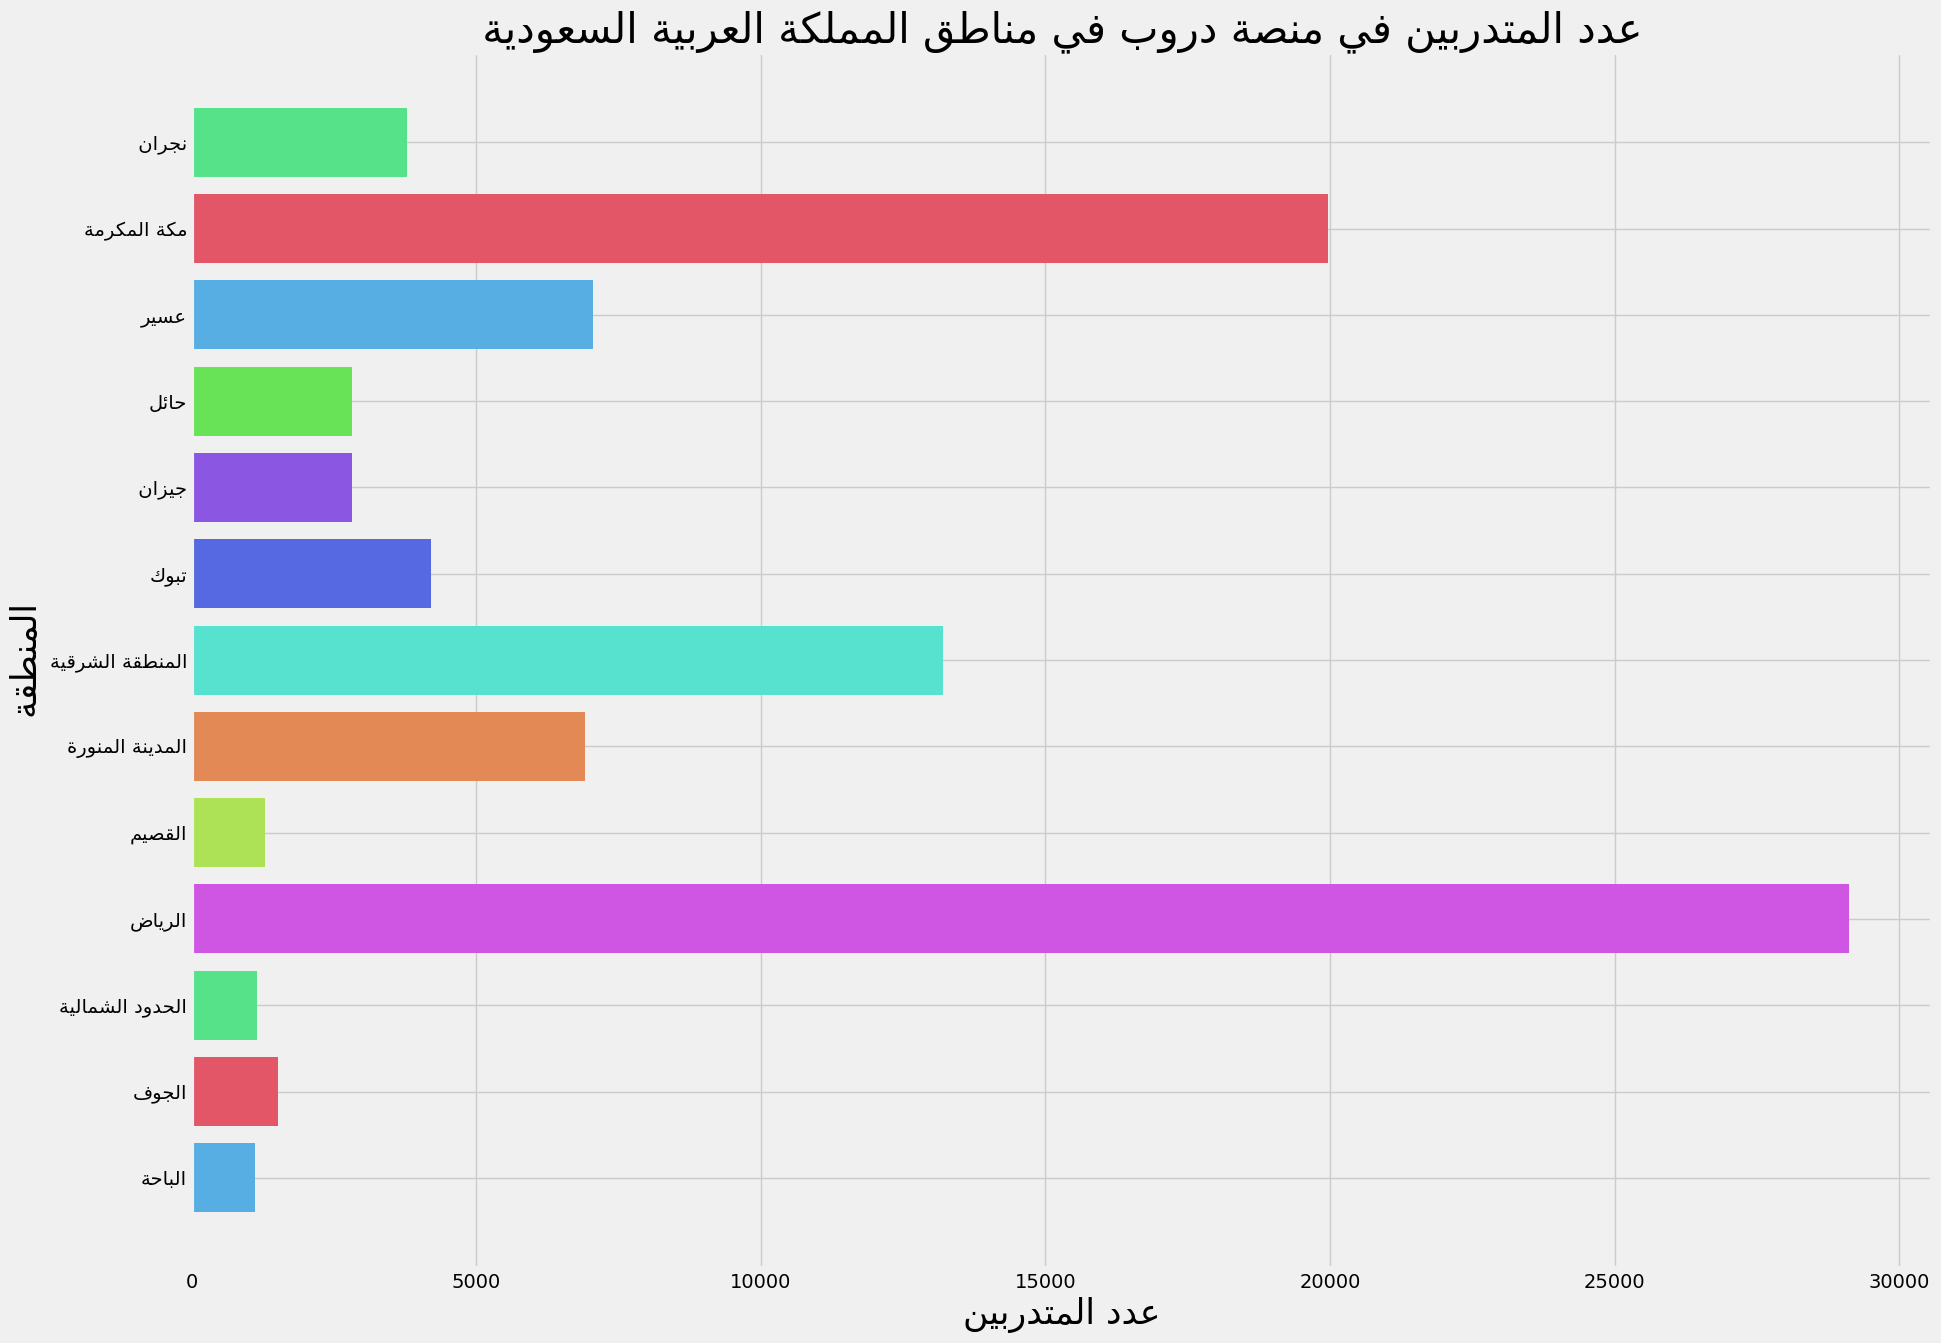

In [87]:
# Draw Horizantal Bar chart
plt.figure(figsize=(20,15))
colors=['#56aee2','#e25668','#56e289','#cf56e2','#aee256','#e28956','#56e2cf','#5668e2','#8a56e2','#68E256']
arabictitle =  get_display(arabic_reshaper.reshape(" عدد المتدربين في منصة دروب في مناطق المملكة العربية السعودية "))

arabicx=  get_display(arabic_reshaper.reshape(" عدد المتدربين "))
arabicy=  get_display(arabic_reshaper.reshape(" المنطقة "))
plt.title(arabictitle,fontsize=30)
plt.xlabel(arabicx,fontsize = 25)
plt.ylabel(arabicy,fontsize = 25)
plt.barh(areas,values , color = colors)


# change the size of x axes and y axes
plt.rc('axes', titlesize=20)        # Controls Axes Title
plt.rc('axes', labelsize=20)        # Controls Axes Labels
plt.rc('xtick', labelsize=20)       # Controls x Tick Labels
plt.rc('ytick', labelsize=20)       # Controls y Tick Labels



plt.show()

## 4
### -مواضيع الدورات الاكثر اهتمامًا على حسب المنطقة.

In [88]:
age_20to30 = stdf[stdf['العمر'].between(20,30)]
age_20to30

,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس,Duration
2,3,21.0,رحلة البحث عن عمل,2022-12-15 20:55:28,2022-12-16 15:19:38,جدة,مكة المكرمة,انثى,0 days 18:24:10
11,12,24.0,معايير المحاسبة الدولية في القطاع العام - الجز...,2022-12-15 21:15:41,NaT,المدينة المنورة,المدينة المنورة,انثى,NaT
35,36,20.0,التواصل الفعال مع العملاء,2022-12-11 03:35:13,2022-12-11 03:54:47,الخرج,الرياض,انثى,0 days 00:19:34
39,40,27.0,أساسيات ومبادئ المحاسبة المالية - الجزء الأول,2022-12-15 18:23:02,2022-12-15 21:48:49,الطائف,مكة المكرمة,ذكر,0 days 03:25:47
45,46,25.0,مهارات الاستماع والتحدث لاختبار IELTS,2022-12-14 12:37:22,NaT,حائل,حائل,ذكر,NaT
...,...,...,...,...,...,...,...,...,...
150763,150764,21.0,مهارات المحادثة باللغة الإنجليزية للمبتدئين,2022-12-11 18:52:29,NaT,تبوك,تبوك,انثى,NaT
150767,150768,28.0,مهارات المحادثة باللغة الإنجليزية للمبتدئين,2022-12-13 14:08:38,NaT,تبوك,تبوك,انثى,NaT
150786,150787,23.0,العقلية الريادية وإدارة الأزمات,2022-12-12 21:02:21,2022-12-12 21:18:53,القصيم,القصيم,ذكر,0 days 00:16:32
150797,150798,24.0,إدارة المنتجات,2022-12-12 11:19:04,2022-12-12 12:42:06,تبوك,تبوك,ذكر,0 days 01:23:02


In [89]:
group1 = age_20to30[['ID','اسم التدريب']].groupby('اسم التدريب').count()
group1.sort_values(by='ID', ascending=False, inplace=True)
group1[0:11]

,ID
اسم التدريب,
برنامج جداول البيانات Excel,525
تعرّف على أساسيات الحاسب الآلي,220
مهارات المحادثة باللغة الإنجليزية للمبتدئين,213
برنامج معالجة النصوص Word,185
إدارة المشتريات وأصحاب مصلحة المشروع,180
الأمن السيبراني,169
برنامج العروض التقديمية PowerPoint,160
العقلية الريادية وإدارة الأزمات,148
مقدمة في مهام الموارد البشرية,123


In [90]:
plt.rcdefaults()
course_20to30 = [get_display(arabic_reshaper.reshape('برنامج جداول البيانات Excel')),
get_display(arabic_reshaper.reshape('برنامج معالجة النصوص Word')),
get_display(arabic_reshaper.reshape('تعرّف على أساسيات الحاسب الآلي')),
get_display(arabic_reshaper.reshape('العقلية الريادية وإدارة الأزمات')),
get_display(arabic_reshaper.reshape('برنامج العروض التقديمية PowerPoint')),
get_display(arabic_reshaper.reshape('نحو تواصل مثمر')),
get_display(arabic_reshaper.reshape('إدارة الضغوط في العمل')),
get_display(arabic_reshaper.reshape('المبيعات والتسويق')),
get_display(arabic_reshaper.reshape('إدارة المشتريات وأصحاب مصلحة المشروع')),
get_display(arabic_reshaper.reshape('الأمن السيبراني'))]
numbers_20to30 = [213,115,92,84,82,74,74,73,70,70]
colors=['#56aee2','#56e289','#aee256','#5668e2','#8a56e2','#cf56e2','#56e2cf','#e25668','#e28956','#68E256']

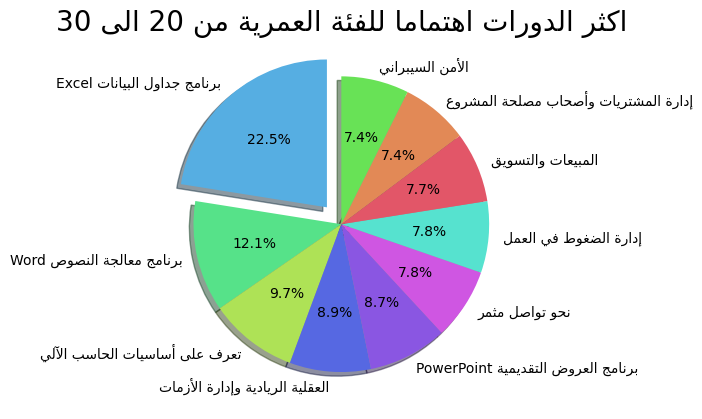

<Figure size 1000x600 with 0 Axes>

In [91]:
plt.title(get_display(arabic_reshaper.reshape('اكثر الدورات اهتمامًا للفئة العمرية من 20 الى 30')),fontsize = 20)
plt.pie(numbers_20to30,labels=course_20to30,explode=[0.15,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True,colors=colors,startangle=90)
plt.figure(figsize=(10, 6))
plt.show()

## 5
### معرفة مواضيع الدوارات التي تم إتمامها منها ومدة الإتمام

In [92]:
stdf_copy5 = pd.DataFrame(stdf, columns=['اسم التدريب','تاريخ التسجيل','تاريخ الانتهاء'])
time_cost=pd.DataFrame((stdf_copy5['تاريخ الانتهاء'] - stdf_copy5['تاريخ التسجيل'])/np.timedelta64(1,'m'))
course_column = pd.DataFrame(stdf['اسم التدريب'])
time_and_course = course_column.join(time_cost)

In [93]:
time_and_course.rename(columns={0:'time','اسم التدريب':'course'},inplace=True)
time_and_course

,course,time
0,برنامج معالجة النصوص Word,NaN
1,إدارة فرق العمل عن بعد,4.366667
2,رحلة البحث عن عمل,1104.166667
3,برنامج معالجة النصوص Word,2.183333
5,خدمة العملاء - تَعامل بإحترافية,NaN
...,...,...
150791,مفاتيح التفاوض الفعال,NaN
150797,إدارة المنتجات,83.033333
150799,مكونات الإبداع في بيئة العمل,7.166667
150802,برنامج جداول البيانات Excel,29.900000


In [94]:
course_name = [
'العقلية الريادية وإدارة الأزمات',
'العناصر الرئيسية لنجاح ريادة الأعمال',
'مكونات الإبداع في بيئة العمل',
'خطة التطوير الفردية',
'استمرارية الأعمال والتعافي من الأزمات',
'إدارة المشتريات وأصحاب مصلحة المشروع',
'برنامج معالجة النصوص Word',
'الممارسات الحديثة في إدارة الموارد البشرية',
'برنامج جداول البيانات Excel',
'برنامج العروض التقديمية PowerPoint',
'بناء الثقة الإبداعية',
'مهارات التفكير الإبداعي',
'الاستثمار الاجتماعي',
'التسويق بالبريد الإلكتروني',
'تنمية الخيال الإبداعي والابتكاري',
'الأمن السيبراني',
'إعداد العروض الفنية والمالية',
'إدارة تكاليف المشروع',
'إدارة الجدول الزمني للمشروع',
'ثقافة العمل عن بعد']

In [95]:
time_to_course= time_and_course[time_and_course['course'].isin(course_name)]
time_to_course.sort_values(by='time',inplace=True)
time_to_course = time_to_course[time_to_course['time']>10]
time_per_course =time_to_course.groupby('course').mean()

C:\Users\moaat\AppData\Local\Temp\ipykernel_28320\1418414944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_to_course.sort_values(by='time',inplace=True)


In [96]:
avg_time=[487.0638528138528,688.9301162790698, 295.62528735632185, 377.0386091127098, 588.1584139264991, 
464.22750382262996, 469.82142857142856, 807.88125, 618.2118727598566, 648.19504048583, 441.87287104622874,
326.71606280193237,449.73408671586714,308.79439834024896,501.99568822553897,692.2361256544503,306.41791546589815,
508.410150078989,698.5926666666667,422.59636559139784]
x=0
for item in avg_time:
    avg_time[x]=item/60
    x+=1
course_for_avg_time = [
get_display(arabic_reshaper.reshape('إدارة تكاليف المشروع')),get_display(arabic_reshaper.reshape('ثقافة العمل عن بعد')),
get_display(arabic_reshaper.reshape('برنامج معالجة النصوص Word')),get_display(arabic_reshaper.reshape('برنامج العروض التقديمية PowerPoint')),
get_display(arabic_reshaper.reshape('إعداد العروض الفنية والمالية')),get_display(arabic_reshaper.reshape('مهارات التفكير الإبداعي')),
get_display(arabic_reshaper.reshape('الممارسات الحديثة في إدارة الموارد البشرية')),get_display(arabic_reshaper.reshape('برنامج جداول البيانات Excel')),
get_display(arabic_reshaper.reshape('الأمن السيبراني')),get_display(arabic_reshaper.reshape('الاستثمار الاجتماعي')),
get_display(arabic_reshaper.reshape('إدارة الجدول الزمني للمشروع')),get_display(arabic_reshaper.reshape('بناء الثقة الإبداعية')),
get_display(arabic_reshaper.reshape('خطة التطوير الفردية')),get_display(arabic_reshaper.reshape('استمرارية الأعمال والتعافي من الأزمات')),
get_display(arabic_reshaper.reshape('العقلية الريادية وإدارة الأزمات')),get_display(arabic_reshaper.reshape('العناصر الرئيسية لنجاح ريادة الأعمال')),
get_display(arabic_reshaper.reshape('إدارة المشتريات وأصحاب مصلحة المشروع')),get_display(arabic_reshaper.reshape('تنمية الخيال الإبداعي والابتكاري')),
get_display(arabic_reshaper.reshape('مكونات الإبداع في بيئة العمل')),get_display(arabic_reshaper.reshape('التسويق بالبريد الإلكتروني'))
]

C:\Users\moaat\AppData\Local\Temp\ipykernel_28320\1243870523.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


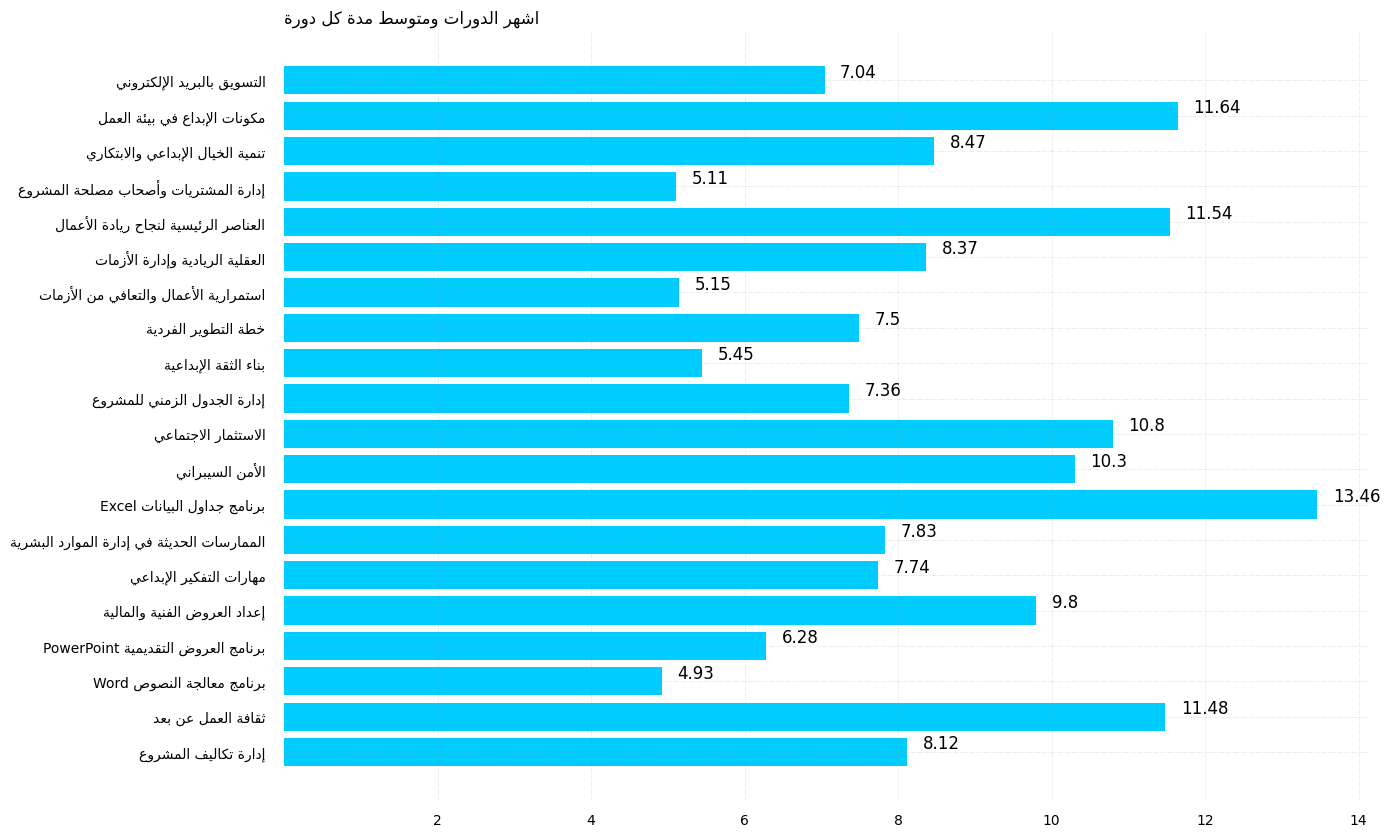

In [97]:
#Figure Size
fig, ax = plt.subplots(figsize =(14, 10))
#Horizontal Bar Plot
ax.barh(course_for_avg_time, avg_time, color='#00CCFF')
#Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
#Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
#padding between axes and labels

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
#gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
#Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12,
             color ='black')
plt.xticks(range(2,15,2))
# Add Plot Title
title = get_display( arabic_reshaper.reshape('اشهر الدورات ومتوسط مدة كل دورة'))
ax.set_title(title, loc ='left' )
plt.show()

## 6
### -معرفة عدد المتدربين  كل فئة عمرية

Text(0, 0.5, 'ﻦﻴﺑﺭﺪﺘﻤﻟﺍ ﺩﺪﻋ')

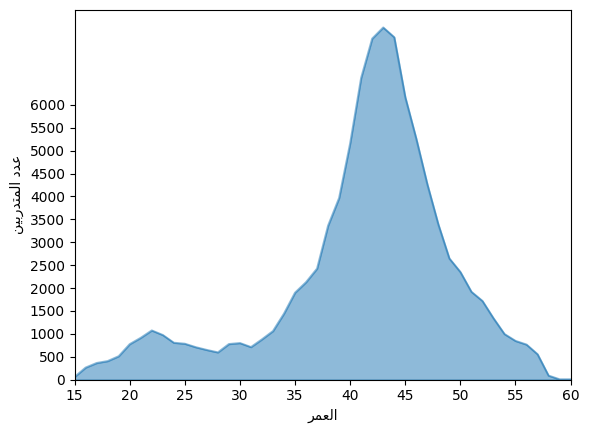

In [98]:

stdf_copy6 = pd.DataFrame(stdf.value_counts('العمر'))
stdf_copy6.sort_values(by='العمر',inplace=True)
area_chart= stdf_copy6.plot.area(stacked=False,legend=False)
plt.xlim(15,60)
plt.xticks(range(15,61,5))
plt.yticks(range(0,6001,500))
xlbl = get_display( arabic_reshaper.reshape('العمر'))
ylbl = get_display( arabic_reshaper.reshape('عدد المتدربين'))
plt.xlabel(xlbl)
plt.ylabel(ylbl)

## 7
### - بيان للفئات العمريه المهتمه بدورات تقنية المعلومات

In [99]:
# to be compeleted
# Group data to by 'اسم التدريب' and count them and sort them from hieast to lowest.
group = stdf.groupby('اسم التدريب').count()
group.sort_values(by='ID', ascending=False, inplace=True)
pd.DataFrame(group)

# Extract IT and Computer science courses and put it in a list
courseslist = group.head(20).index.tolist()
courseslist = [courseslist[2],courseslist[6],courseslist[7],courseslist[9],courseslist[11],courseslist[12]]
courseslist


['استمرارية الأعمال والتعافي من الأزمات',
 'برنامج جداول البيانات Excel',
 'برنامج معالجة النصوص Word',
 'برنامج العروض التقديمية PowerPoint',
 'تعرّف على أساسيات الحاسب الآلي',
 'الأمن السيبراني']

In [100]:
# Make sub dataframe (itfr) which is include only IT and computer courses
itfr = stdf[stdf['اسم التدريب'].isin(courseslist)]

#change 'العمر' from float type to int type
itfr = itfr.astype({'العمر':'int'})


# Add 'Age Catagory' to datset so we can calcolate 

ageg=['15 To 20 Yrs','20 To 25 Yrs' ,'25 To 30 Yrs', '30 To 35 Yrs','35 To 40 Yrs','40 to 45 Yrs','45 To 50 Yrs', 'Above 50 Yrs' ]
bins =[15,20,25,30,35,40,45,50 ,np.inf]
itfr['Age Catagory'] = pd.cut(itfr['العمر'],bins=bins,labels=ageg)
itfr.groupby('Age Catagory').count()


,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس,Duration
Age Catagory,,,,,,,,,
15 To 20 Yrs,371,371,371,371,179,371,371,371,179
20 To 25 Yrs,694,694,694,694,284,694,694,694,284
25 To 30 Yrs,485,485,485,485,255,485,485,485,255
30 To 35 Yrs,635,635,635,635,423,635,635,635,423
35 To 40 Yrs,1738,1738,1738,1738,1288,1738,1738,1738,1288
40 to 45 Yrs,3617,3617,3617,3617,2782,3617,3617,3617,2782
45 To 50 Yrs,1791,1791,1791,1791,1382,1791,1791,1791,1382
Above 50 Yrs,801,801,801,801,614,801,801,801,614


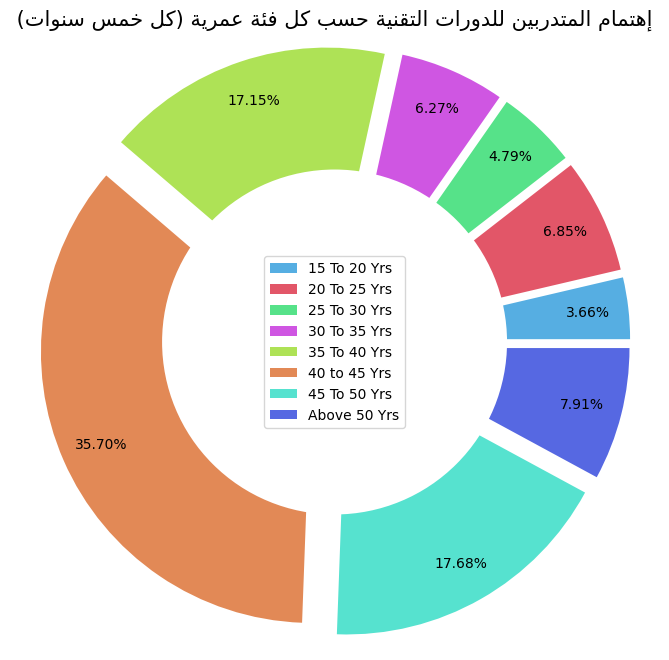

In [101]:
# Draw the digram
group = itfr[['ID','Age Catagory']].groupby('Age Catagory').count()
labels = list(group.index) # Labels
value = [int(x) for x in group.values] # X values
colors=['#56aee2','#e25668','#56e289','#cf56e2','#aee256','#e28956','#56e2cf','#5668e2','#8a56e2','#68E256']
plt.figure(figsize=(8,8)) # the size of figure
arabictitle =  get_display(arabic_reshaper.reshape(" إهتمام المتدربين للدورات التقنية حسب كل فئة عمرية (كل خمس سنوات) "))
plt.title( arabictitle ,fontsize=15)

plt.pie(value , colors = colors, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1 ,0.1] ,autopct='%1.2f%%',pctdistance=0.85, radius=1.1)
plt.legend(labels,loc=10)
#Draw white circle to to make it like donut shape.
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.show()

## 8
### -معرفة اكثر الدورات اهتماما للفئة العمرية من ١٥ الى ٢٠

In [102]:
age_15to20= stdf[stdf["العمر"].between(15,20)]
age_15to20

,ID,العمر,اسم التدريب,تاريخ التسجيل,تاريخ الانتهاء,المدينة,المنطقة,الجنس,Duration
35,36,20.0,التواصل الفعال مع العملاء,2022-12-11 03:35:13,2022-12-11 03:54:47,الخرج,الرياض,انثى,0 days 00:19:34
149,150,15.0,أمن الحوسبة السحابية,2022-12-15 14:02:39,2022-12-15 15:01:05,الدمام,المنطقة الشرقية,ذكر,0 days 00:58:26
247,248,20.0,إدارة المخاطر,2022-12-14 22:13:31,NaT,المدينة المنورة,المدينة المنورة,ذكر,NaT
345,346,19.0,كن موظفا ذا خلق,2022-12-15 15:46:43,NaT,الرياض,الرياض,انثى,NaT
355,356,20.0,برنامج جداول البيانات Excel,2022-12-15 15:09:34,NaT,الرياض,الرياض,ذكر,NaT
...,...,...,...,...,...,...,...,...,...
150605,150606,20.0,أمن المنشآت,2022-12-13 00:45:18,NaT,الدمام,المنطقة الشرقية,ذكر,NaT
150611,150612,18.0,الأمن السيبراني والتقنية,2022-12-07 13:22:52,NaT,الاحساء,المنطقة الشرقية,ذكر,NaT
150733,150734,18.0,الأمن السيبراني,2022-12-07 14:27:25,2022-12-07 15:28:48,الخبر,المنطقة الشرقية,ذكر,0 days 01:01:23
150764,150765,19.0,التعامل مع الآثار السلبية لارتفاع درجات الحرار...,2022-12-11 21:37:17,NaT,تبوك,تبوك,انثى,NaT


In [103]:
group2 = age_15to20[['ID' , 'اسم التدريب']].groupby('اسم التدريب').count()
group2.sort_values(by='ID', ascending=False, inplace=True)
group2.head(5)

,ID
اسم التدريب,
برنامج جداول البيانات Excel,164
تعرّف على أساسيات الحاسب الآلي,68
الأمن السيبراني,57
مهارات المحادثة باللغة الإنجليزية للمبتدئين,52
إدارة المشتريات وأصحاب مصلحة المشروع,44


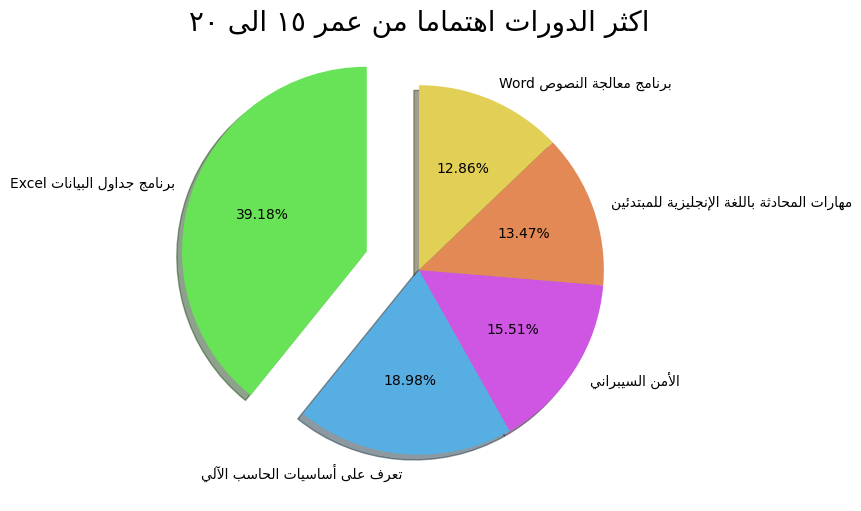

In [104]:
training = [get_display(arabic_reshaper.reshape('برنامج جداول البيانات Excel')),
            get_display(arabic_reshaper.reshape('تعرّف على أساسيات الحاسب الآلي')),
            get_display(arabic_reshaper.reshape('الأمن السيبراني')),
            get_display(arabic_reshaper.reshape('مهارات المحادثة باللغة الإنجليزية للمبتدئين')),
            get_display(arabic_reshaper.reshape('برنامج معالجة النصوص Word'))]
plt.figure(figsize=(10, 6))
Num_of_trainees = [ 192,93,76,66,63]
plt.title(get_display(arabic_reshaper.reshape("اكثر الدورات اهتماما من عمر ١٥ الى ٢٠")),fontsize = 20)
plt.pie(Num_of_trainees,labels=training,colors=['#68e256','#56aee2','#cf56e2','#e28956','#e2cf56'], autopct='%1.2f%%',  startangle=90, explode = [0.3, 0, 0, 0, 0],shadow=True)

plt.show()

In [105]:
### panda profiling
import sys

!{sys.executable} -m pip install pandas_profiling

  Using cached pandas_profiling-3.6.2-py2.py3-none-any.whl (328 kB)
  Using cached scipy-1.9.3-cp310-cp310-win_amd64.whl (40.1 MB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached pydantic-1.10.4-cp310-cp310-win_amd64.whl (2.1 MB)
  Using cached statsmodels-0.13.5-cp310-cp310-win_amd64.whl (9.1 MB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached phik-0.12.3-cp310-cp310-win_amd64.whl (663 kB)
  Using cached networkx-3.0-py3-none-any.whl (2.0 MB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached MarkupSafe-2.1.2-cp310-cp310-win_amd64.whl (16 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Using cached PyWavelets-1.4.1-cp310-cp310-win_amd64.whl (4.2 MB)


In [106]:
# Pandas-profiling reporet
from pandas_profiling import ProfileReport
profile = ProfileReport(stdf,title='Dorop Pandas Profile Report')
profile.to_file(output_file="my_reporet.html")

c:\Users\moaat\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\moaat\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
Summarize dataset:  62%|██████▎   | 10/16 [00:01<00:01,  3.65it/s, Calculate auto correlation]     c:\Users\moaat\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old